In [56]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:11
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:11
   ---------------------------------------- 0.1/13.3 MB 762.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/13.3 MB 762.6 kB/s eta 0:00:18
   ---------------------------------------- 0.2/13.3 MB 701.4 kB/s eta 0:00:19
   ---------------------------------------- 0.2/13.3 MB 701.4 kB/s eta 0:00:19
    --------------------------------------- 0.2/13.3 MB 655.1 kB/s eta 0:00:21
    --------------------------------------- 0.3/13.3 MB 711.1 kB/s eta 0:00:19
    --------------------------------------- 0.3/13.3 MB 737.3 kB/s eta 0:00:18
    --------------------------------------- 0.3/13.3 MB 724.7 kB/s eta 0:00:18
   - -------------------------------------- 0.4/13.3 MB 760.1 kB/s eta 0:00:18
   - -------------------------------------- 0.4/13.3 MB 789.2 kB/

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from prophet import Prophet
import random
warnings.filterwarnings("ignore")

#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')


In [20]:
mathura_road=pd.read_csv("Raw_data_1Hr_2023_site_103_CRRI_Mathura_Road_Delhi_IMD_1Hr.csv")

In [19]:
mathura_road

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,2023-01-01 00:00:00,320.030000,229.3475,26.5150,1.6800,18.2325
1,2023-01-01 01:00:00,205.282500,293.7725,26.5125,1.5750,18.0725
2,2023-01-01 02:00:00,169.927500,253.5325,26.5175,1.2675,17.8175
3,2023-01-01 03:00:00,67.213333,225.8825,26.5700,0.9550,17.6375
4,2023-01-01 04:00:00,151.030000,181.4200,26.5950,0.8275,17.7575
...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,191.067500,259.9325,19.0250,0.9275,36.1800
8756,2023-12-31 20:00:00,167.437500,268.4025,19.0325,0.9125,34.6200
8757,2023-12-31 21:00:00,146.115000,216.0600,19.0950,0.8800,34.3800
8758,2023-12-31 22:00:00,138.255000,166.4150,19.1325,0.8550,33.9500


In [23]:
mathura_road.tail(10)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
8750,2023-12-31 14:00:00,174.3625,265.9600,44.5800,20.5425,65.1375,NaN,NaN,0.8500,33.4150,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8751,2023-12-31 15:00:00,169.2825,263.6075,41.1325,19.8325,60.9850,NaN,NaN,0.8300,33.6050,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8752,2023-12-31 16:00:00,173.2825,262.7250,35.3675,18.5825,53.9525,NaN,NaN,0.8275,33.4900,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8753,2023-12-31 17:00:00,191.4250,272.6500,35.8475,18.6650,54.5150,NaN,NaN,0.8625,33.9075,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8754,2023-12-31 18:00:00,185.5575,262.2150,36.7925,18.8025,55.5975,NaN,NaN,0.9050,34.5250,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8755,2023-12-31 19:00:00,191.0675,259.9325,37.4100,19.0250,56.4325,NaN,NaN,0.9275,36.1800,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8756,2023-12-31 20:00:00,167.4375,268.4025,37.3400,19.0325,56.3700,NaN,NaN,0.9125,34.6200,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8757,2023-12-31 21:00:00,146.1150,216.0600,37.7750,19.0950,56.8625,NaN,NaN,0.8800,34.3800,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8758,2023-12-31 22:00:00,138.2550,166.4150,38.1725,19.1325,57.3050,NaN,NaN,0.8550,33.9500,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8759,2023-12-31 23:00:00,136.8225,163.1475,38.5375,19.1600,57.7000,NaN,NaN,0.8400,33.5575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [24]:
8759-744 #we need only november to november (31*24)

8015

In [39]:
mathura_road=mathura_road[0:8015]
mathura_road.tail(10)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
8005,2023-11-30 13:00:00,194.9475,244.1475,26.2275,17.6200,43.8500,NaN,NaN,0.7675,44.7925,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8006,2023-11-30 14:00:00,186.5900,224.4075,26.9575,17.8425,44.8000,NaN,NaN,0.6950,47.9175,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8007,2023-11-30 15:00:00,153.0700,237.7575,26.6625,17.6750,44.3375,NaN,NaN,0.6125,57.7275,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8008,2023-11-30 16:00:00,149.6200,215.8200,26.2400,17.6050,43.8475,NaN,NaN,0.5950,48.0975,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8009,2023-11-30 17:00:00,148.5050,212.7175,26.2300,17.5200,43.7500,NaN,NaN,0.6850,19.8675,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8010,2023-11-30 18:00:00,160.5300,252.7800,27.9425,17.8975,45.8425,NaN,NaN,0.9725,14.2175,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8011,2023-11-30 19:00:00,183.5800,321.7425,27.5525,17.9775,45.5325,NaN,NaN,0.9800,15.8225,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8012,2023-11-30 20:00:00,197.3200,275.4175,27.1600,17.6975,44.8600,NaN,NaN,1.1400,15.4300,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8013,2023-11-30 21:00:00,190.0525,275.3050,28.0550,17.9775,46.0200,NaN,NaN,1.1100,14.6800,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8014,2023-11-30 22:00:00,185.0125,270.6775,46.7950,21.5675,68.3575,NaN,NaN,1.3450,15.8900,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [40]:
mathura_road.iloc[:,1:3]

,PM2.5 (µg/m³),PM10 (µg/m³)
0,320.030000,229.3475
1,205.282500,293.7725
2,169.927500,253.5325
3,67.213333,225.8825
4,151.030000,181.4200
...,...,...
8010,160.530000,252.7800
8011,183.580000,321.7425
8012,197.320000,275.4175
8013,190.052500,275.3050


In [26]:
mathura_road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            8760 non-null   object 
 1   PM2.5 (µg/m³)        8158 non-null   float64
 2   PM10 (µg/m³)         8021 non-null   float64
 3   NO (µg/m³)           7732 non-null   float64
 4   NO2 (µg/m³)          8093 non-null   float64
 5   NOx (ppb)            8103 non-null   float64
 6   NH3 (µg/m³)          0 non-null      float64
 7   SO2 (µg/m³)          0 non-null      float64
 8   CO (mg/m³)           7937 non-null   float64
 9   Ozone (µg/m³)        8171 non-null   float64
 10  Benzene (µg/m³)      0 non-null      float64
 11  Toluene (µg/m³)      0 non-null      float64
 12  Xylene (µg/m³)       0 non-null      float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  Eth-Benzene (µg/m³)  0 non-null      float64
 15  MP-Xylene (µg/m³)    0 non-null      f

In [41]:
mathura_road.drop(columns=["NO (µg/m³)", 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)','Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
mathura_road.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)',
       'CO (mg/m³)', 'Ozone (µg/m³)'],
      dtype='object')

In [43]:
mathura_road

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,2023-01-01 00:00:00,320.030000,229.3475,26.5150,1.6800,18.2325
1,2023-01-01 01:00:00,205.282500,293.7725,26.5125,1.5750,18.0725
2,2023-01-01 02:00:00,169.927500,253.5325,26.5175,1.2675,17.8175
3,2023-01-01 03:00:00,67.213333,225.8825,26.5700,0.9550,17.6375
4,2023-01-01 04:00:00,151.030000,181.4200,26.5950,0.8275,17.7575
...,...,...,...,...,...,...
8010,2023-11-30 18:00:00,160.530000,252.7800,17.8975,0.9725,14.2175
8011,2023-11-30 19:00:00,183.580000,321.7425,17.9775,0.9800,15.8225
8012,2023-11-30 20:00:00,197.320000,275.4175,17.6975,1.1400,15.4300
8013,2023-11-30 21:00:00,190.052500,275.3050,17.9775,1.1100,14.6800


In [44]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)    601
PM10 (µg/m³)     739
NO2 (µg/m³)      667
CO (mg/m³)       818
Ozone (µg/m³)    589
dtype: int64

<AxesSubplot:>

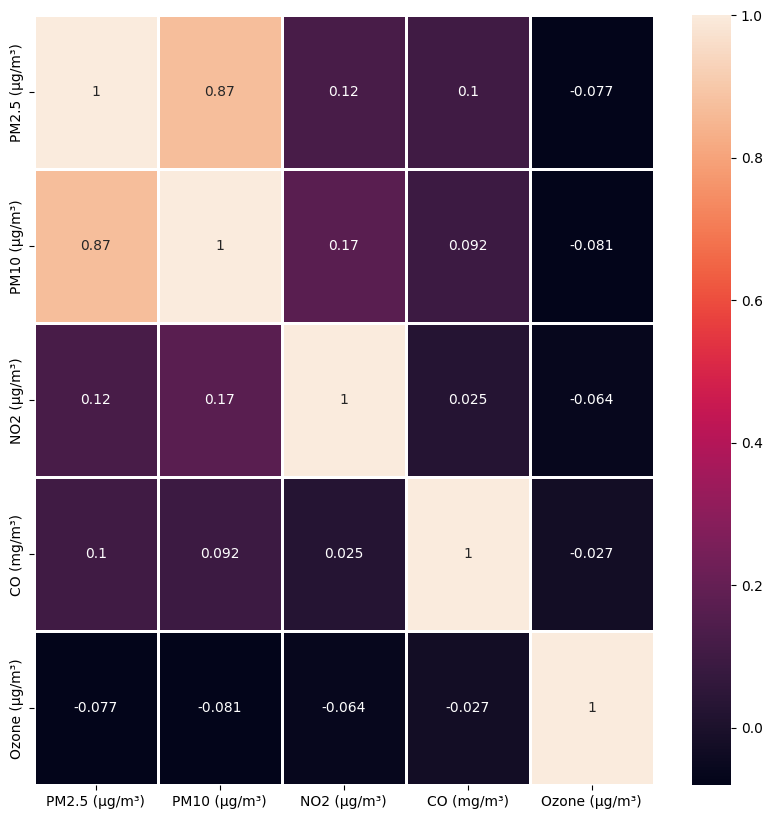

In [45]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(np.round(mathura_road.corr(),3),annot=True,linewidths=.9)

array([[<AxesSubplot:title={'center':'PM2.5 (µg/m³)'}>,
        <AxesSubplot:title={'center':'PM10 (µg/m³)'}>],
       [<AxesSubplot:title={'center':'NO2 (µg/m³)'}>,
        <AxesSubplot:title={'center':'CO (mg/m³)'}>],
       [<AxesSubplot:title={'center':'Ozone (µg/m³)'}>, <AxesSubplot:>]],
      dtype=object)

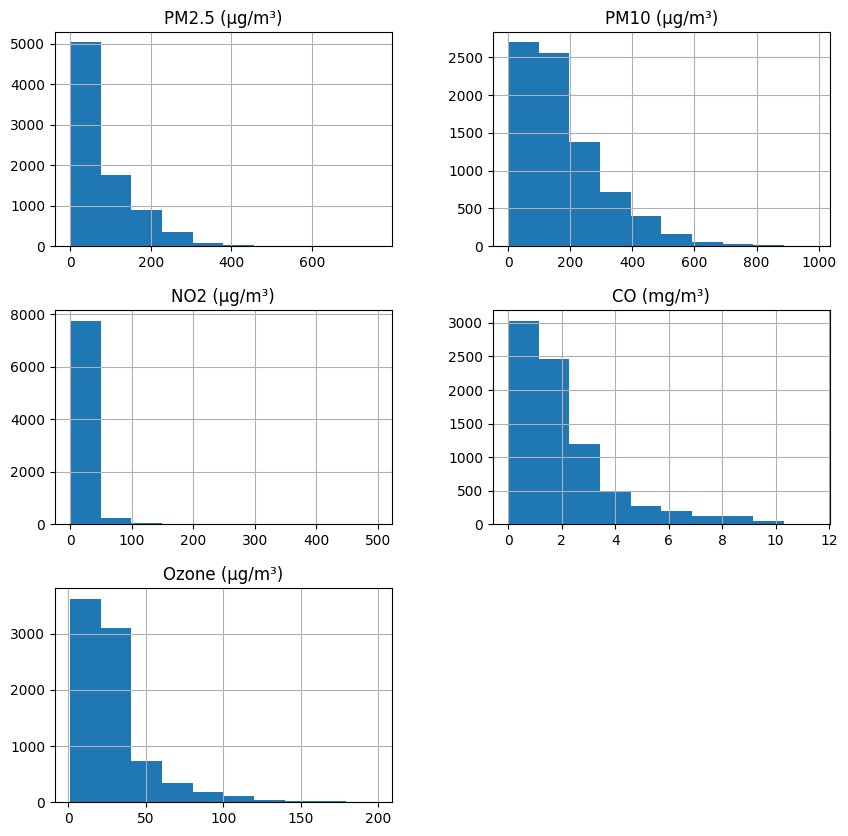

In [31]:
mathura_road.hist(bins=10,figsize=(10,10))

In [18]:
mathura_road["PM2.5 (µg/m³)"].max()

759.5799999999999

In [19]:
mathura_road["PM2.5 (µg/m³)"].value_counts()

45.6025     4
41.1200     3
41.7000     3
44.6125     3
21.1950     3
           ..
38.3650     1
43.3575     1
38.1825     1
30.2325     1
185.0125    1
Name: PM2.5 (µg/m³), Length: 6941, dtype: int64

In [46]:
mathura_road["PM2.5 (µg/m³)"].median()

49.287499999999994

In [47]:
mathura_road["PM2.5 (µg/m³)"].fillna(mathura_road["PM2.5 (µg/m³)"].median(),inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [48]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)      0
PM10 (µg/m³)     739
NO2 (µg/m³)      667
CO (mg/m³)       818
Ozone (µg/m³)    589
dtype: int64

In [49]:
mathura_road["PM10 (µg/m³)"].value_counts()

85.7825     3
97.9100     3
46.7250     3
122.8150    3
112.2150    3
           ..
100.0425    1
131.3625    1
193.3275    1
163.3925    1
270.6775    1
Name: PM10 (µg/m³), Length: 7103, dtype: int64

In [50]:
mathura_road["PM10 (µg/m³)"].median()

128.6375

In [51]:
mathura_road["PM10 (µg/m³)"].fillna(mathura_road["PM10 (µg/m³)"].median(),inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [52]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)      0
PM10 (µg/m³)       0
NO2 (µg/m³)      667
CO (mg/m³)       818
Ozone (µg/m³)    589
dtype: int64

In [53]:
mathura_road["NO2 (µg/m³)"].value_counts()

30.2000    27
23.2175     9
23.0325     8
0.0300      7
22.9350     7
           ..
4.4925      1
6.0400      1
8.2575      1
8.3700      1
17.6050     1
Name: NO2 (µg/m³), Length: 5163, dtype: int64

In [55]:
mathura_road["NO2 (µg/m³)"].median()

18.3525

In [56]:
mathura_road["NO2 (µg/m³)"].fillna(mathura_road["NO2 (µg/m³)"].median(),inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [57]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)      0
PM10 (µg/m³)       0
NO2 (µg/m³)        0
CO (mg/m³)       818
Ozone (µg/m³)    589
dtype: int64

In [58]:
mathura_road["Ozone (µg/m³)"].value_counts()

21.7775    6
17.4075    6
13.7175    6
21.0600    6
17.5850    6
          ..
22.5850    1
24.7550    1
28.9875    1
34.0875    1
15.8900    1
Name: Ozone (µg/m³), Length: 5650, dtype: int64

In [59]:
mathura_road["Ozone (µg/m³)"].fillna(mathura_road["Ozone (µg/m³)"].median(),inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [60]:
mathura_road.isna().sum()

Timestamp          0
PM2.5 (µg/m³)      0
PM10 (µg/m³)       0
NO2 (µg/m³)        0
CO (mg/m³)       818
Ozone (µg/m³)      0
dtype: int64

In [66]:
mathura_road["CO (mg/m³)"].median()

1.53

In [68]:
mathura_road["CO (mg/m³)"].fillna(mathura_road["CO (mg/m³)"].median(),inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [69]:
mathura_road.isna().sum()

Timestamp        0
PM2.5 (µg/m³)    0
PM10 (µg/m³)     0
NO2 (µg/m³)      0
CO (mg/m³)       0
Ozone (µg/m³)    0
dtype: int64

# AQI

In [37]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

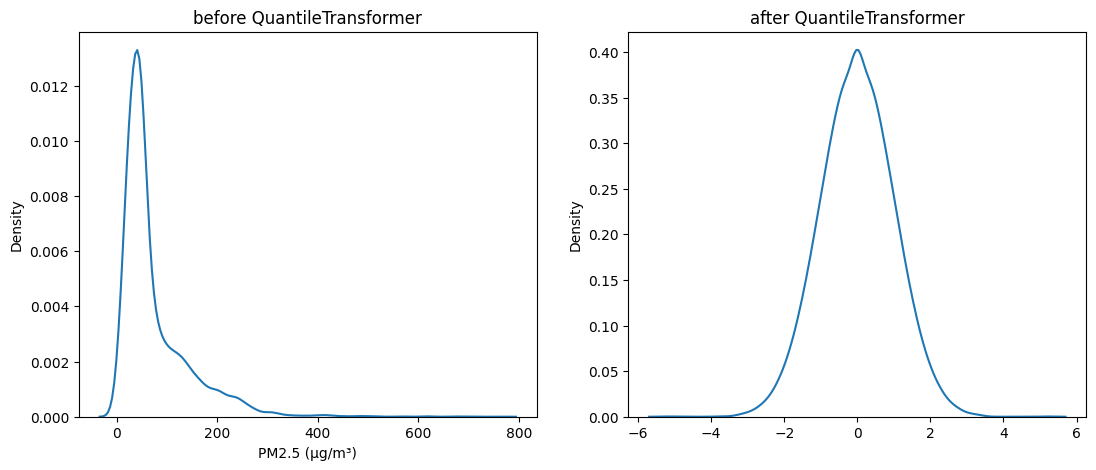

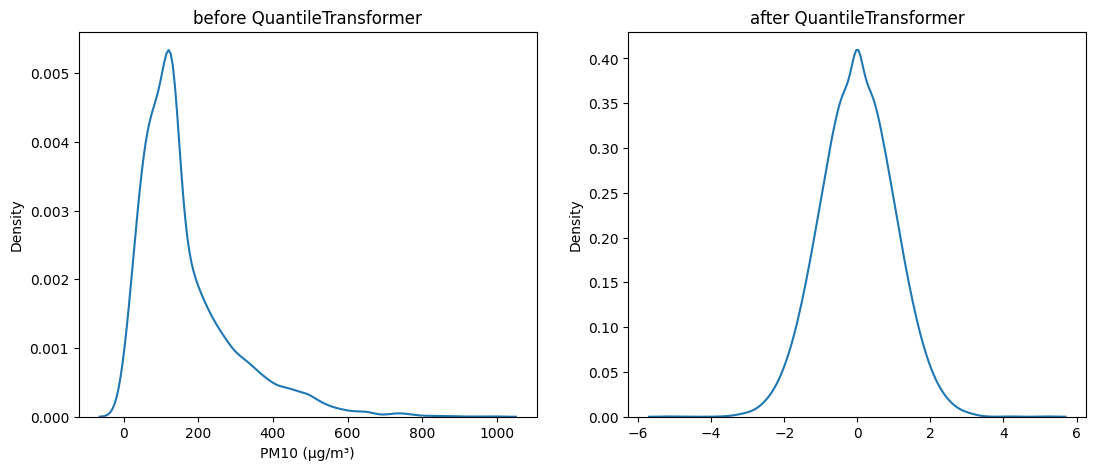

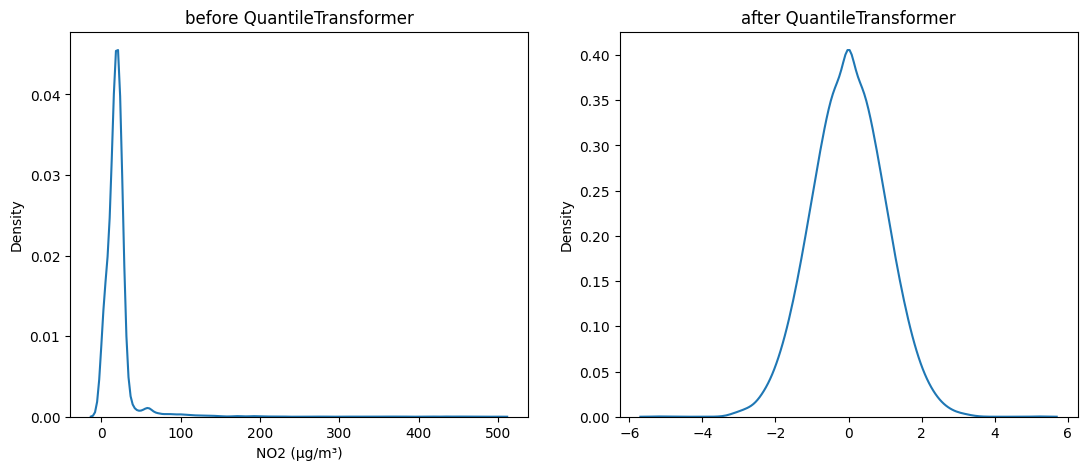

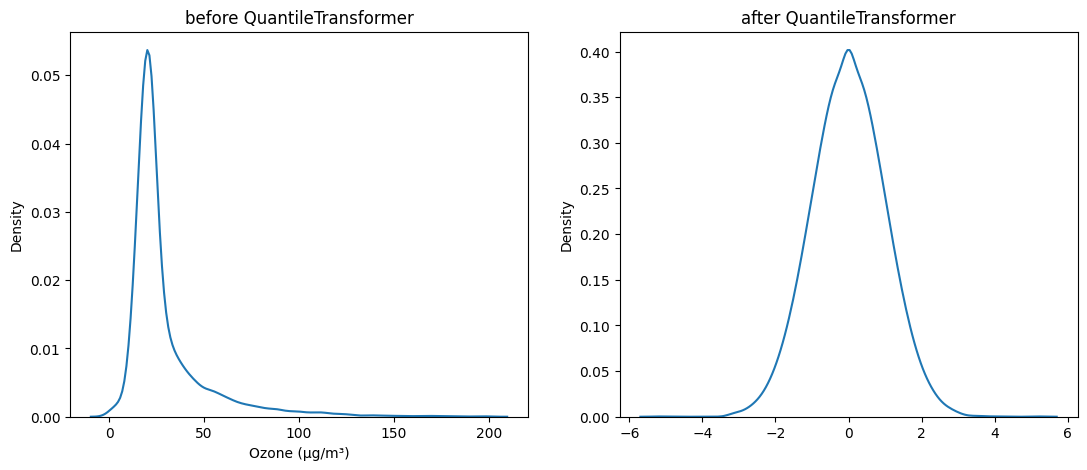

In [38]:
for col in mathura_road.columns:
    plots(mathura_road, col, QuantileTransformer(output_distribution='normal'))

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ozone (µg/m³)'>

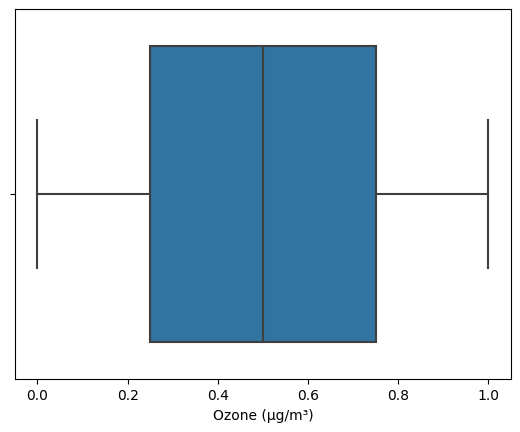

In [39]:
sns.boxplot(df_new["Ozone (µg/m³)"])

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PM2.5 (µg/m³)'>

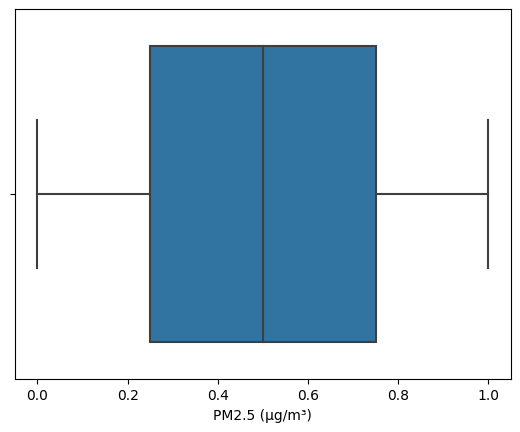

In [40]:
sns.boxplot(df_new["PM2.5 (µg/m³)"])

In [41]:
mathura_road.corr()

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),Ozone (µg/m³)
PM2.5 (µg/m³),1.000000,0.838523,0.125417,-0.064595
PM10 (µg/m³),0.838523,1.000000,0.165109,-0.069541
NO2 (µg/m³),0.125417,0.165109,1.000000,-0.057989
Ozone (µg/m³),-0.064595,-0.069541,-0.057989,1.000000


<h2>#for aqi</h2>

In [5]:
mathura_road

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2023-01-01 00:00:00,320.030000,229.3475,102.5225,26.5150,129.0275,NaN,NaN,1.6800,18.2325,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2023-01-01 01:00:00,205.282500,293.7725,102.9875,26.5125,129.5000,NaN,NaN,1.5750,18.0725,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2023-01-01 02:00:00,169.927500,253.5325,102.1700,26.5175,128.6900,NaN,NaN,1.2675,17.8175,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2023-01-01 03:00:00,67.213333,225.8825,101.1475,26.5700,127.7125,NaN,NaN,0.9550,17.6375,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2023-01-01 04:00:00,151.030000,181.4200,100.9850,26.5950,127.5800,NaN,NaN,0.8275,17.7575,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,191.067500,259.9325,37.4100,19.0250,56.4325,NaN,NaN,0.9275,36.1800,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8756,2023-12-31 20:00:00,167.437500,268.4025,37.3400,19.0325,56.3700,NaN,NaN,0.9125,34.6200,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8757,2023-12-31 21:00:00,146.115000,216.0600,37.7750,19.0950,56.8625,NaN,NaN,0.8800,34.3800,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8758,2023-12-31 22:00:00,138.255000,166.4150,38.1725,19.1325,57.3050,NaN,NaN,0.8550,33.9500,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [6]:
mathura_road.isna().sum()

Timestamp                 0
PM2.5 (µg/m³)           602
PM10 (µg/m³)            739
NO (µg/m³)             1028
NO2 (µg/m³)             667
NOx (ppb)               657
NH3 (µg/m³)            8760
SO2 (µg/m³)            8760
CO (mg/m³)              823
Ozone (µg/m³)           589
Benzene (µg/m³)        8760
Toluene (µg/m³)        8760
Xylene (µg/m³)         8760
O Xylene (µg/m³)       8760
Eth-Benzene (µg/m³)    8760
MP-Xylene (µg/m³)      8760
AT (°C)                8760
RH (%)                 8760
WS (m/s)               8760
WD (deg)               8760
RF (mm)                8760
TOT-RF (mm)               0
SR (W/mt2)             8760
BP (mmHg)              8760
VWS (m/s)              8760
dtype: int64

In [22]:
mathura_road.drop(columns=['NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)','Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],inplace=True)

In [23]:
mathura_road

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,2023-01-01 00:00:00,320.030000,229.3475,102.5225,26.5150,1.6800,18.2325
1,2023-01-01 01:00:00,205.282500,293.7725,102.9875,26.5125,1.5750,18.0725
2,2023-01-01 02:00:00,169.927500,253.5325,102.1700,26.5175,1.2675,17.8175
3,2023-01-01 03:00:00,67.213333,225.8825,101.1475,26.5700,0.9550,17.6375
4,2023-01-01 04:00:00,151.030000,181.4200,100.9850,26.5950,0.8275,17.7575
...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,191.067500,259.9325,37.4100,19.0250,0.9275,36.1800
8756,2023-12-31 20:00:00,167.437500,268.4025,37.3400,19.0325,0.9125,34.6200
8757,2023-12-31 21:00:00,146.115000,216.0600,37.7750,19.0950,0.8800,34.3800
8758,2023-12-31 22:00:00,138.255000,166.4150,38.1725,19.1325,0.8550,33.9500


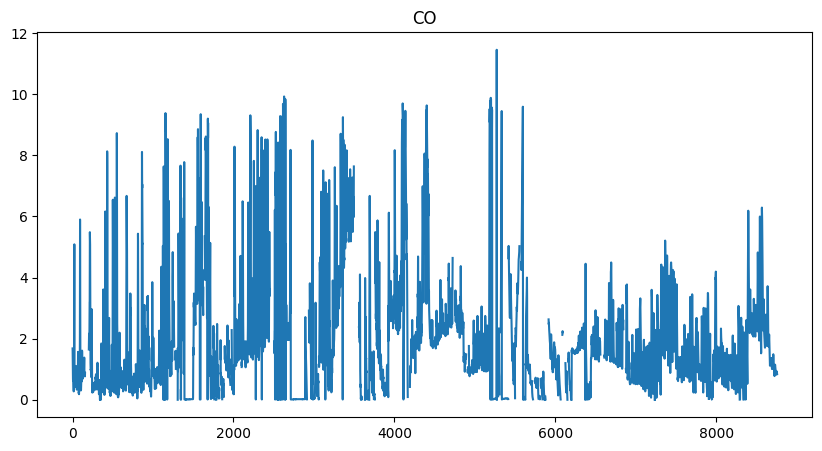

In [27]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
mathura_road['CO (mg/m³)'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[0],
                     title='CO')
plt.show()     #on basis of count

In [30]:
mathura_road["Timestamp"]=pd.to_datetime(mathura_road['Timestamp']) #converting data type into date

In [34]:
mathura_road["Timestamp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Timestamp
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In [35]:
mathura_road=mathura_road.set_index("Timestamp") 

In [36]:
mathura_road.head()

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
Timestamp,,,,,,
2023-01-01 00:00:00,320.030000,229.3475,102.5225,26.5150,1.6800,18.2325
2023-01-01 01:00:00,205.282500,293.7725,102.9875,26.5125,1.5750,18.0725
2023-01-01 02:00:00,169.927500,253.5325,102.1700,26.5175,1.2675,17.8175
2023-01-01 03:00:00,67.213333,225.8825,101.1475,26.5700,0.9550,17.6375
2023-01-01 04:00:00,151.030000,181.4200,100.9850,26.5950,0.8275,17.7575


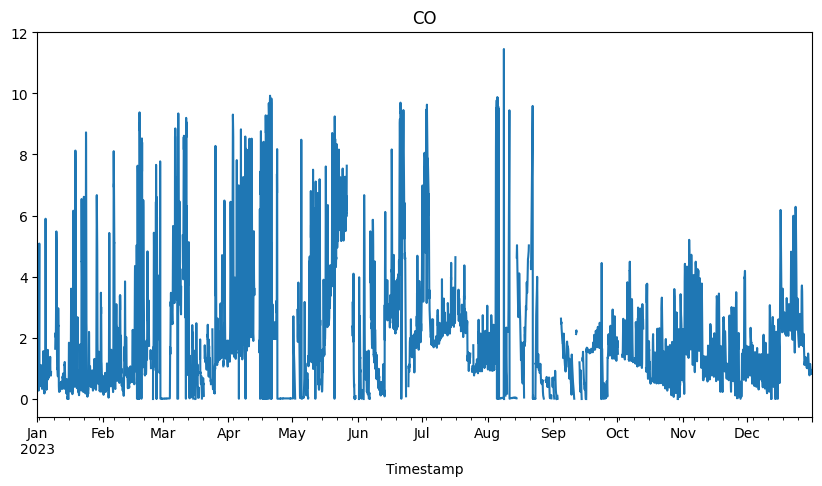

In [37]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
mathura_road['CO (mg/m³)'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[0],
                     title='CO')
plt.show()     #on basis of timestamp

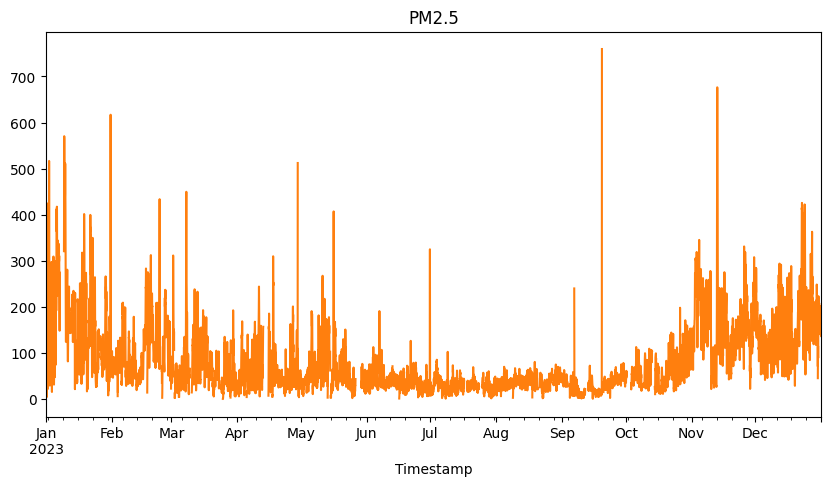

In [39]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette()
mathura_road['PM2.5 (µg/m³)'].plot(style='-',figsize=(10,5),
                     ms=1,
                     color=color_pal[1],
                     title='PM2.5')
plt.show()     #on basis of timestamp

In [41]:
#now converting data according to date day time week year month

from pandas.api.types import CategoricalDtype

cat_type= CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    
    df= df.copy()
    df['date']=df.index
    df['hour']=df['date'].dt.hour
    df['dayofweek']=df['date'].dt.dayofweek
    df['weekday']=df['date'].dt.day_name()
    df['weekday']=df['weekday'].astype(cat_type)
    df['quarter']=df['date'].dt.quarter
    df['month']=df['date'].dt.month
    df['year']=df['date'].dt.year
    df['dayofyear']=df['date'].dt.dayofyear
    df['dayofmonth']=df['date'].dt.day
    #df['weekofyear']=df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100+df.date.dt.day -320)%1300
    
    X=df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekday']]
    return X

X= create_features(mathura_road)
all_data= pd.concat([X,mathura_road],axis=1)

In [42]:
all_data

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekday,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
Timestamp,,,,,,,,,,,,,,
2023-01-01 00:00:00,0,6,1,1,2023,1,1,Sunday,320.030000,229.3475,102.5225,26.5150,1.6800,18.2325
2023-01-01 01:00:00,1,6,1,1,2023,1,1,Sunday,205.282500,293.7725,102.9875,26.5125,1.5750,18.0725
2023-01-01 02:00:00,2,6,1,1,2023,1,1,Sunday,169.927500,253.5325,102.1700,26.5175,1.2675,17.8175
2023-01-01 03:00:00,3,6,1,1,2023,1,1,Sunday,67.213333,225.8825,101.1475,26.5700,0.9550,17.6375
2023-01-01 04:00:00,4,6,1,1,2023,1,1,Sunday,151.030000,181.4200,100.9850,26.5950,0.8275,17.7575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,19,6,4,12,2023,365,31,Sunday,191.067500,259.9325,37.4100,19.0250,0.9275,36.1800
2023-12-31 20:00:00,20,6,4,12,2023,365,31,Sunday,167.437500,268.4025,37.3400,19.0325,0.9125,34.6200
2023-12-31 21:00:00,21,6,4,12,2023,365,31,Sunday,146.115000,216.0600,37.7750,19.0950,0.8800,34.3800


In [43]:
# now adding seasons
season_month_north = {
            12:'Winter', 1:'Winter', 2:'Spring',
            3:'Spring', 4:'Summer', 5:'Summer',
            6:'Summer', 7:'Monsoon', 8:'Monsoon',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
all_data['seasons']=all_data['month'].map(season_month_north)

In [44]:
all_data

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekday,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),seasons
Timestamp,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0,6,1,1,2023,1,1,Sunday,320.030000,229.3475,102.5225,26.5150,1.6800,18.2325,Winter
2023-01-01 01:00:00,1,6,1,1,2023,1,1,Sunday,205.282500,293.7725,102.9875,26.5125,1.5750,18.0725,Winter
2023-01-01 02:00:00,2,6,1,1,2023,1,1,Sunday,169.927500,253.5325,102.1700,26.5175,1.2675,17.8175,Winter
2023-01-01 03:00:00,3,6,1,1,2023,1,1,Sunday,67.213333,225.8825,101.1475,26.5700,0.9550,17.6375,Winter
2023-01-01 04:00:00,4,6,1,1,2023,1,1,Sunday,151.030000,181.4200,100.9850,26.5950,0.8275,17.7575,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,19,6,4,12,2023,365,31,Sunday,191.067500,259.9325,37.4100,19.0250,0.9275,36.1800,Winter
2023-12-31 20:00:00,20,6,4,12,2023,365,31,Sunday,167.437500,268.4025,37.3400,19.0325,0.9125,34.6200,Winter
2023-12-31 21:00:00,21,6,4,12,2023,365,31,Sunday,146.115000,216.0600,37.7750,19.0950,0.8800,34.3800,Winter


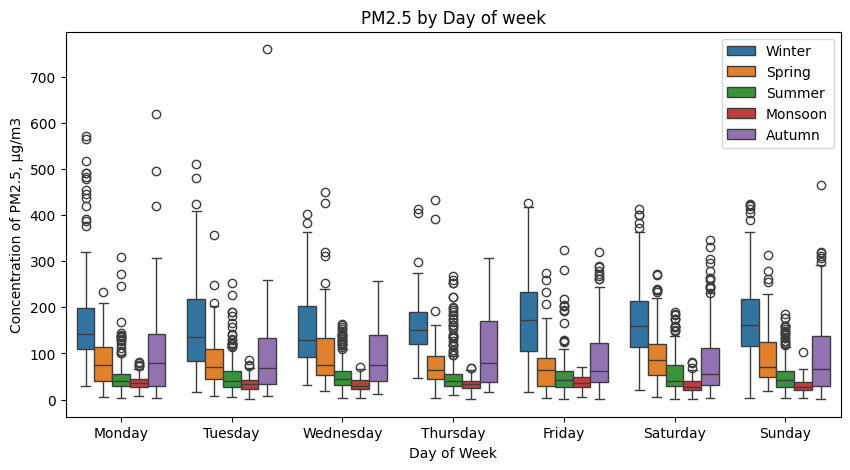

In [46]:
fig, ax= plt.subplots(figsize=(10,5))
sns.boxplot(data=all_data.dropna(),
           x='weekday',
           y="PM2.5 (µg/m³)",
           hue='seasons',
           ax=ax,
           linewidth=1)
ax.set_title('PM2.5 by Day of week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Сoncentration of PM2.5, μg/m3')
ax.legend(bbox_to_anchor=(1,1))
plt.show()

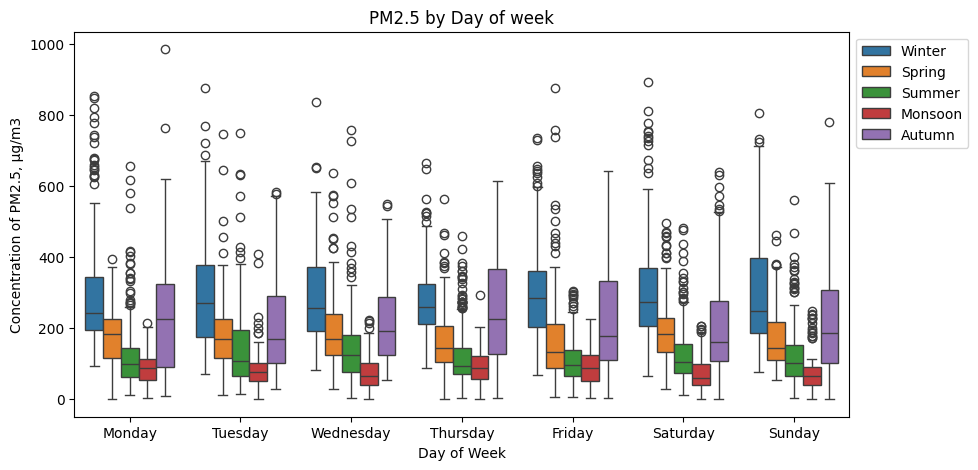

In [47]:
fig, ax= plt.subplots(figsize=(10,5))
sns.boxplot(data=all_data.dropna(),
           x='weekday',
           y="PM10 (µg/m³)",
           hue='seasons',
           ax=ax,
           linewidth=1)
ax.set_title('PM2.5 by Day of week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Сoncentration of PM2.5, μg/m3')
ax.legend(bbox_to_anchor=(1,1))
plt.show()

<Axes: >

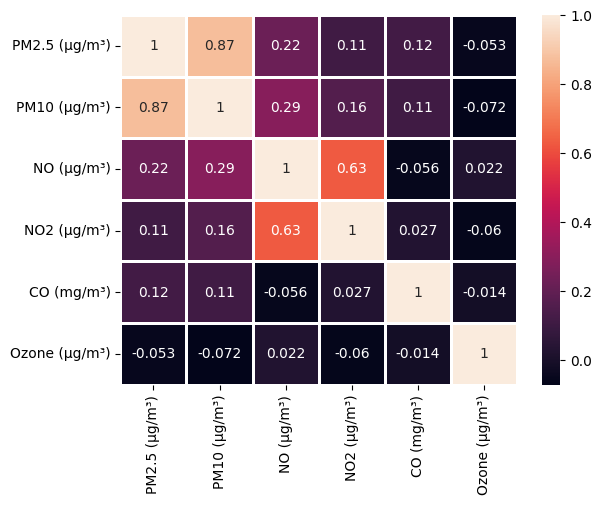

In [52]:
#remember the correlation , useful while training the model
sns.heatmap(all_data[["PM2.5 (µg/m³)","PM10 (µg/m³)","NO (µg/m³)","NO2 (µg/m³)","CO (mg/m³)","Ozone (µg/m³)"]].corr(),annot=True,linewidths=.9)

<h3>#In a single day , hourly how pm2.5 behaves </h3>

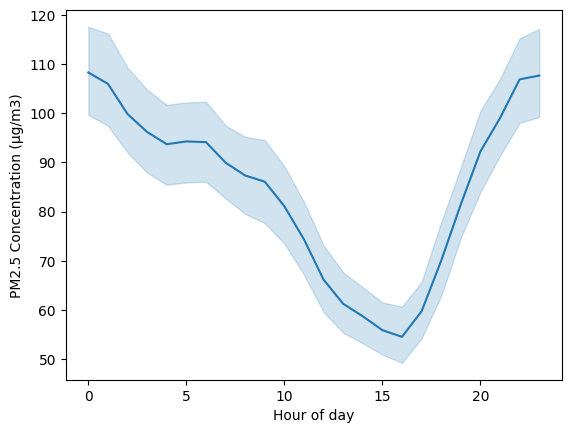

In [53]:
sns.lineplot(x='hour', y='PM2.5 (µg/m³)', data=all_data)   
plt.xlabel('Hour of day')
plt.ylabel('PM2.5 Concentration (µg/m3)')
plt.show()

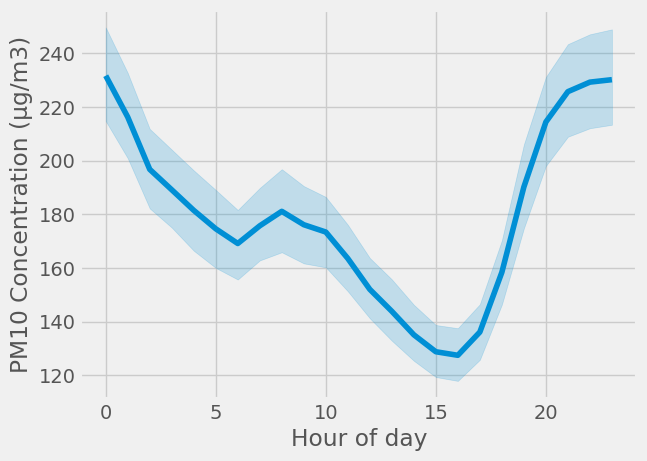

In [59]:
sns.lineplot(x='hour', y='PM10 (µg/m³)', data=all_data)   
plt.xlabel('Hour of day')
plt.ylabel('PM10 Concentration (µg/m3)')
plt.show()

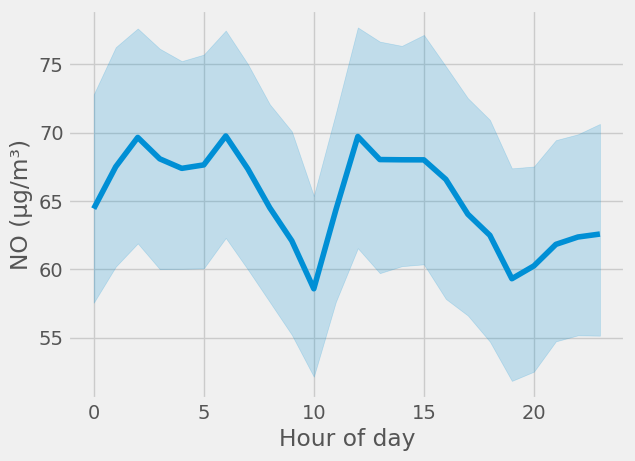

In [60]:
sns.lineplot(x='hour', y='NO (µg/m³)', data=all_data)   
plt.xlabel('Hour of day')
plt.ylabel('NO (µg/m³)')
plt.show()

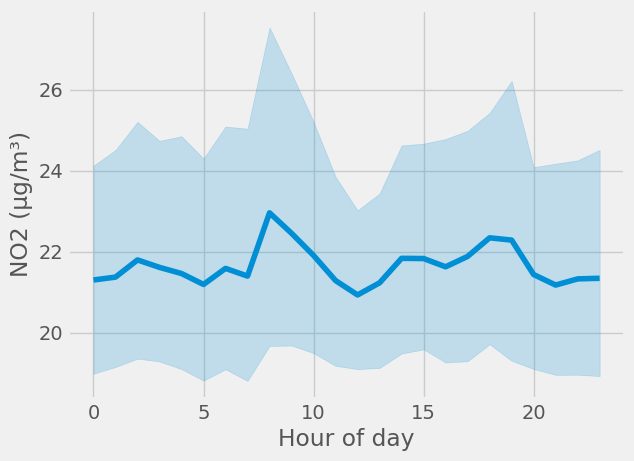

In [64]:
sns.lineplot(x='hour', y='NO2 (µg/m³)', data=all_data)   
plt.xlabel('Hour of day')
plt.ylabel('NO2 (µg/m³)')
plt.show()

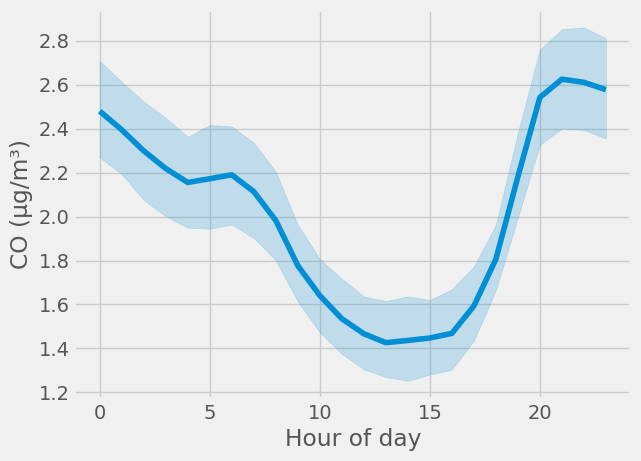

In [65]:
sns.lineplot(x='hour', y='CO (mg/m³)', data=all_data)   
plt.xlabel('Hour of day')
plt.ylabel('CO (µg/m³)')
plt.show()

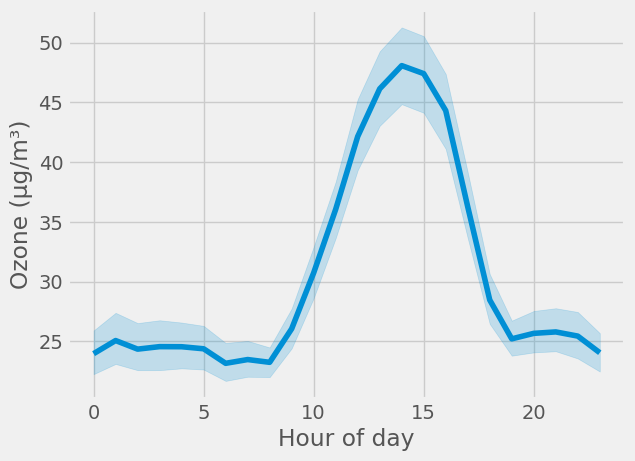

In [66]:
sns.lineplot(x='hour', y='Ozone (µg/m³)', data=all_data)   
plt.xlabel('Hour of day')
plt.ylabel('Ozone (µg/m³)')
plt.show()

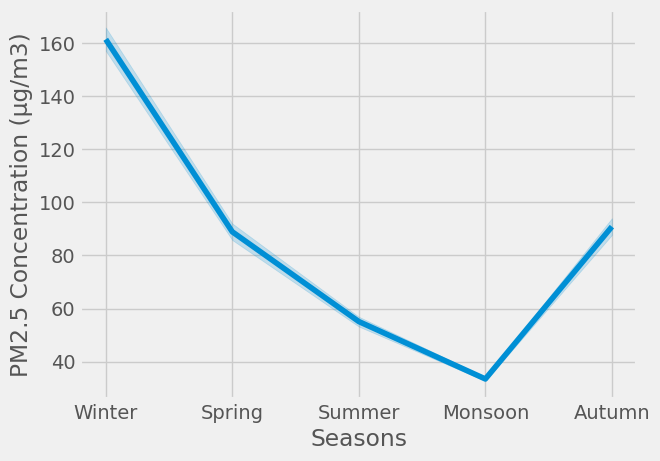

In [69]:
#what about the seasons

sns.lineplot(x='seasons', y='PM2.5 (µg/m³)', data=all_data)
plt.xlabel('Seasons')
plt.ylabel('PM2.5 Concentration (µg/m3)')
plt.show()

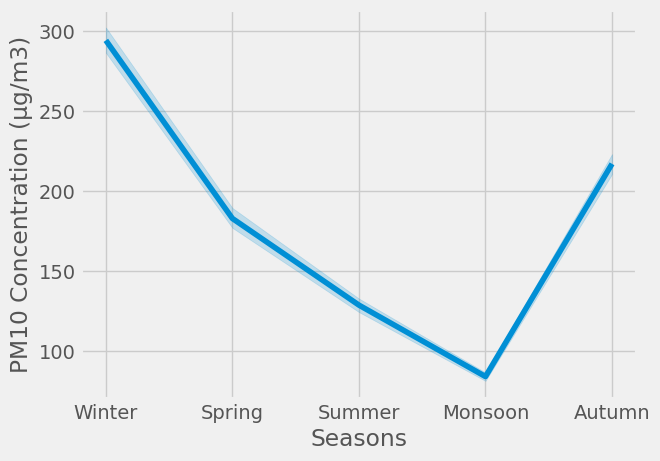

In [70]:
sns.lineplot(x='seasons', y='PM10 (µg/m³)', data=all_data)
plt.xlabel('Seasons')
plt.ylabel('PM10 Concentration (µg/m3)')
plt.show()

In [73]:
all_data.tail()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekday,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),seasons
Timestamp,,,,,,,,,,,,,,,
2023-12-31 19:00:00,19,6,4,12,2023,365,31,Sunday,191.0675,259.9325,37.4100,19.0250,0.9275,36.1800,Winter
2023-12-31 20:00:00,20,6,4,12,2023,365,31,Sunday,167.4375,268.4025,37.3400,19.0325,0.9125,34.6200,Winter
2023-12-31 21:00:00,21,6,4,12,2023,365,31,Sunday,146.1150,216.0600,37.7750,19.0950,0.8800,34.3800,Winter
2023-12-31 22:00:00,22,6,4,12,2023,365,31,Sunday,138.2550,166.4150,38.1725,19.1325,0.8550,33.9500,Winter
2023-12-31 23:00:00,23,6,4,12,2023,365,31,Sunday,136.8225,163.1475,38.5375,19.1600,0.8400,33.5575,Winter


<h2>test tarin data </h2>

In [76]:
#spliting data
split_date='2023-10-01'
pm_train=all_data.loc[all_data.index<=split_date].copy()
pm_train=pd.DataFrame(pm_train[["PM2.5 (µg/m³)","PM10 (µg/m³)","NO (µg/m³)","NO2 (µg/m³)","CO (mg/m³)","Ozone (µg/m³)"]])
pm_test=all_data.loc[all_data.index>split_date].copy()
pm_test=pd.DataFrame(pm_test[["PM2.5 (µg/m³)","PM10 (µg/m³)","NO (µg/m³)","NO2 (µg/m³)","CO (mg/m³)","Ozone (µg/m³)"]])

#plotting train and test
#pm_test.rename(columns={'PM2.5 (µg/m³)':'Test set1'})\
#                .join(pm_train.rename(columns={'PM2.5 (µg/m³)':'Train set'}), how='outer')\
#                .plot(figsize=(10,5), title='PM2.5 (µg/m³)', style=".", ms=1)
#plt.show()

In [77]:
pm_train

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
Timestamp,,,,,,
2023-01-01 00:00:00,320.030000,229.3475,102.5225,26.5150,1.6800,18.2325
2023-01-01 01:00:00,205.282500,293.7725,102.9875,26.5125,1.5750,18.0725
2023-01-01 02:00:00,169.927500,253.5325,102.1700,26.5175,1.2675,17.8175
2023-01-01 03:00:00,67.213333,225.8825,101.1475,26.5700,0.9550,17.6375
2023-01-01 04:00:00,151.030000,181.4200,100.9850,26.5950,0.8275,17.7575
...,...,...,...,...,...,...
2023-09-30 20:00:00,44.787500,138.6450,14.7750,13.9875,1.9100,13.4550
2023-09-30 21:00:00,42.632500,122.7625,12.0825,13.3650,1.9850,12.8450
2023-09-30 22:00:00,48.335000,131.5800,11.6450,13.3300,2.0225,13.1400


In [78]:
pm_test

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
Timestamp,,,,,,
2023-10-01 01:00:00,41.0750,132.8500,11.7400,13.3000,1.6875,12.9525
2023-10-01 02:00:00,35.4850,122.6450,11.0625,13.1800,1.7125,13.3725
2023-10-01 03:00:00,51.2425,129.3525,11.6875,13.2725,1.8025,13.7025
2023-10-01 04:00:00,52.2350,144.9375,12.3900,13.5275,1.7950,13.9275
2023-10-01 05:00:00,45.6725,141.9275,12.8850,13.5250,1.9125,14.3150
...,...,...,...,...,...,...
2023-12-31 19:00:00,191.0675,259.9325,37.4100,19.0250,0.9275,36.1800
2023-12-31 20:00:00,167.4375,268.4025,37.3400,19.0325,0.9125,34.6200
2023-12-31 21:00:00,146.1150,216.0600,37.7750,19.0950,0.8800,34.3800


In [80]:
pm_train=pm_train.reset_index()

In [81]:
pm_train

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,2023-01-01 00:00:00,320.030000,229.3475,102.5225,26.5150,1.6800,18.2325
1,2023-01-01 01:00:00,205.282500,293.7725,102.9875,26.5125,1.5750,18.0725
2,2023-01-01 02:00:00,169.927500,253.5325,102.1700,26.5175,1.2675,17.8175
3,2023-01-01 03:00:00,67.213333,225.8825,101.1475,26.5700,0.9550,17.6375
4,2023-01-01 04:00:00,151.030000,181.4200,100.9850,26.5950,0.8275,17.7575
...,...,...,...,...,...,...,...
6548,2023-09-30 20:00:00,44.787500,138.6450,14.7750,13.9875,1.9100,13.4550
6549,2023-09-30 21:00:00,42.632500,122.7625,12.0825,13.3650,1.9850,12.8450
6550,2023-09-30 22:00:00,48.335000,131.5800,11.6450,13.3300,2.0225,13.1400
6551,2023-09-30 23:00:00,46.695000,145.1125,11.6775,13.2900,1.9200,13.0625


In [82]:
pm_test=pm_test.reset_index()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,2023-10-01 01:00:00,41.0750,132.8500,11.7400,13.3000,1.6875,12.9525
1,2023-10-01 02:00:00,35.4850,122.6450,11.0625,13.1800,1.7125,13.3725
2,2023-10-01 03:00:00,51.2425,129.3525,11.6875,13.2725,1.8025,13.7025
3,2023-10-01 04:00:00,52.2350,144.9375,12.3900,13.5275,1.7950,13.9275
4,2023-10-01 05:00:00,45.6725,141.9275,12.8850,13.5250,1.9125,14.3150
...,...,...,...,...,...,...,...
2202,2023-12-31 19:00:00,191.0675,259.9325,37.4100,19.0250,0.9275,36.1800
2203,2023-12-31 20:00:00,167.4375,268.4025,37.3400,19.0325,0.9125,34.6200
2204,2023-12-31 21:00:00,146.1150,216.0600,37.7750,19.0950,0.8800,34.3800
2205,2023-12-31 22:00:00,138.2550,166.4150,38.1725,19.1325,0.8550,33.9500


In [83]:
m=Prophet()
m.fit(pm_train)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [100]:
pm_train=pm_train.rename(columns={'Timestamp':'ds','y_1':'y'}) #works only one parameter at a time 

In [101]:
pm_train

,ds,y,y_2,y_3,y_4,CO (mg/m³),y_5
0,2023-01-01 00:00:00,320.030000,229.3475,102.5225,26.5150,1.6800,18.2325
1,2023-01-01 01:00:00,205.282500,293.7725,102.9875,26.5125,1.5750,18.0725
2,2023-01-01 02:00:00,169.927500,253.5325,102.1700,26.5175,1.2675,17.8175
3,2023-01-01 03:00:00,67.213333,225.8825,101.1475,26.5700,0.9550,17.6375
4,2023-01-01 04:00:00,151.030000,181.4200,100.9850,26.5950,0.8275,17.7575
...,...,...,...,...,...,...,...
6548,2023-09-30 20:00:00,44.787500,138.6450,14.7750,13.9875,1.9100,13.4550
6549,2023-09-30 21:00:00,42.632500,122.7625,12.0825,13.3650,1.9850,12.8450
6550,2023-09-30 22:00:00,48.335000,131.5800,11.6450,13.3300,2.0225,13.1400
6551,2023-09-30 23:00:00,46.695000,145.1125,11.6775,13.2900,1.9200,13.0625


In [102]:
m=Prophet()
m.fit(pm_train)

00:09:34 - cmdstanpy - INFO - Chain [1] start processing
00:09:35 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
pm_test

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
Timestamp,,,,,,
2023-10-01 01:00:00,41.0750,132.8500,11.7400,13.3000,1.6875,12.9525
2023-10-01 02:00:00,35.4850,122.6450,11.0625,13.1800,1.7125,13.3725
2023-10-01 03:00:00,51.2425,129.3525,11.6875,13.2725,1.8025,13.7025
2023-10-01 04:00:00,52.2350,144.9375,12.3900,13.5275,1.7950,13.9275
2023-10-01 05:00:00,45.6725,141.9275,12.8850,13.5250,1.9125,14.3150
...,...,...,...,...,...,...
2023-12-31 19:00:00,191.0675,259.9325,37.4100,19.0250,0.9275,36.1800
2023-12-31 20:00:00,167.4375,268.4025,37.3400,19.0325,0.9125,34.6200
2023-12-31 21:00:00,146.1150,216.0600,37.7750,19.0950,0.8800,34.3800


In [104]:
pm_test=pm_test.reset_index().rename(columns={'Timestamp':'ds','PM2.5 (µg/m³)':'y'})

In [105]:
pm_test_fcst=m.predict(pm_test)

In [106]:
pm_test_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-10-01 01:00:00,35.413748,-1.575809,120.168991,35.413748,35.413748,19.910150,19.910150,19.910150,15.776968,15.776968,15.776968,4.133182,4.133182,4.133182,0.0,0.0,0.0,55.323898
1,2023-10-01 02:00:00,35.416115,-10.353356,110.121487,35.416115,35.416115,15.297157,15.297157,15.297157,11.404807,11.404807,11.404807,3.892350,3.892350,3.892350,0.0,0.0,0.0,50.713272
2,2023-10-01 03:00:00,35.418483,-15.821291,105.179882,35.418483,35.418483,11.447234,11.447234,11.447234,7.820828,7.820828,7.820828,3.626407,3.626407,3.626407,0.0,0.0,0.0,46.865717
3,2023-10-01 04:00:00,35.420850,-17.682715,107.062068,35.420850,35.420850,9.064177,9.064177,9.064177,5.725665,5.725665,5.725665,3.338511,3.338511,3.338511,0.0,0.0,0.0,44.485027
4,2023-10-01 05:00:00,35.423217,-21.202065,106.424623,35.423217,35.423217,7.931454,7.931454,7.931454,4.899408,4.899408,4.899408,3.032047,3.032047,3.032047,0.0,0.0,0.0,43.354672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,2023-12-31 19:00:00,40.626611,-107.261454,188.806751,-88.532770,181.699175,-5.033688,-5.033688,-5.033688,-3.881358,-3.881358,-3.881358,-1.152330,-1.152330,-1.152330,0.0,0.0,0.0,35.592923
2203,2023-12-31 20:00:00,40.628978,-99.779396,193.385997,-88.604920,181.781109,4.110321,4.110321,4.110321,5.422257,5.422257,5.422257,-1.311936,-1.311936,-1.311936,0.0,0.0,0.0,44.739299
2204,2023-12-31 21:00:00,40.631345,-93.554600,203.382237,-88.677070,181.863043,12.156332,12.156332,12.156332,13.596959,13.596959,13.596959,-1.440628,-1.440628,-1.440628,0.0,0.0,0.0,52.787677
2205,2023-12-31 22:00:00,40.633713,-84.770037,216.185743,-88.818558,181.944977,17.516282,17.516282,17.516282,19.053814,19.053814,19.053814,-1.537532,-1.537532,-1.537532,0.0,0.0,0.0,58.149995


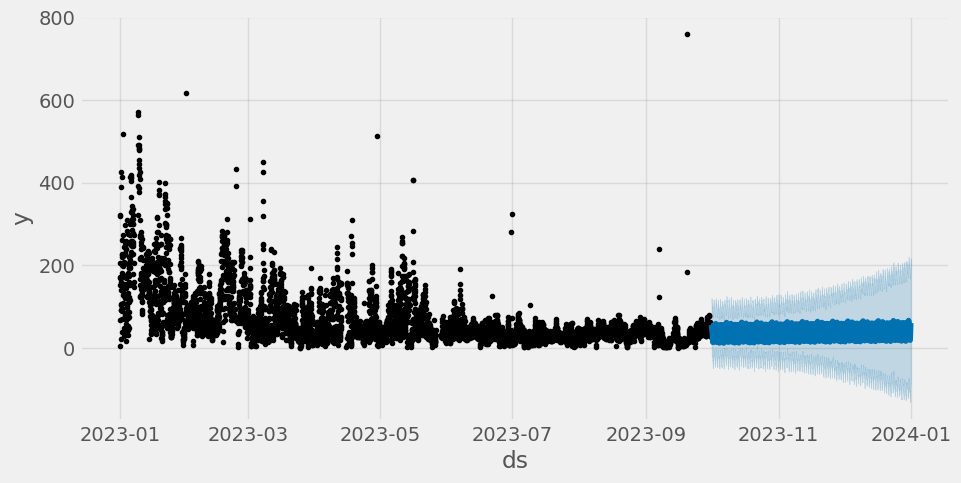

In [107]:
fig,ax= plt.subplots(figsize=(10,5))
fig= m.plot(pm_test_fcst,ax=ax)
plt.show()

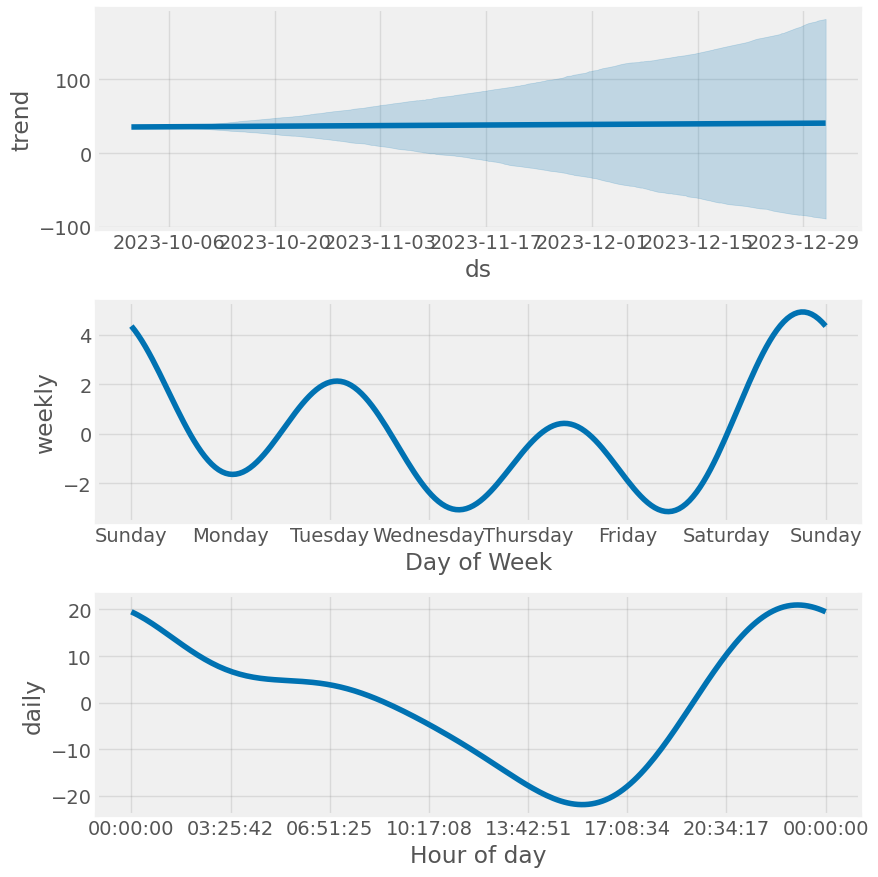

In [108]:
fig= m.plot_components(pm_test_fcst)
plt.show()

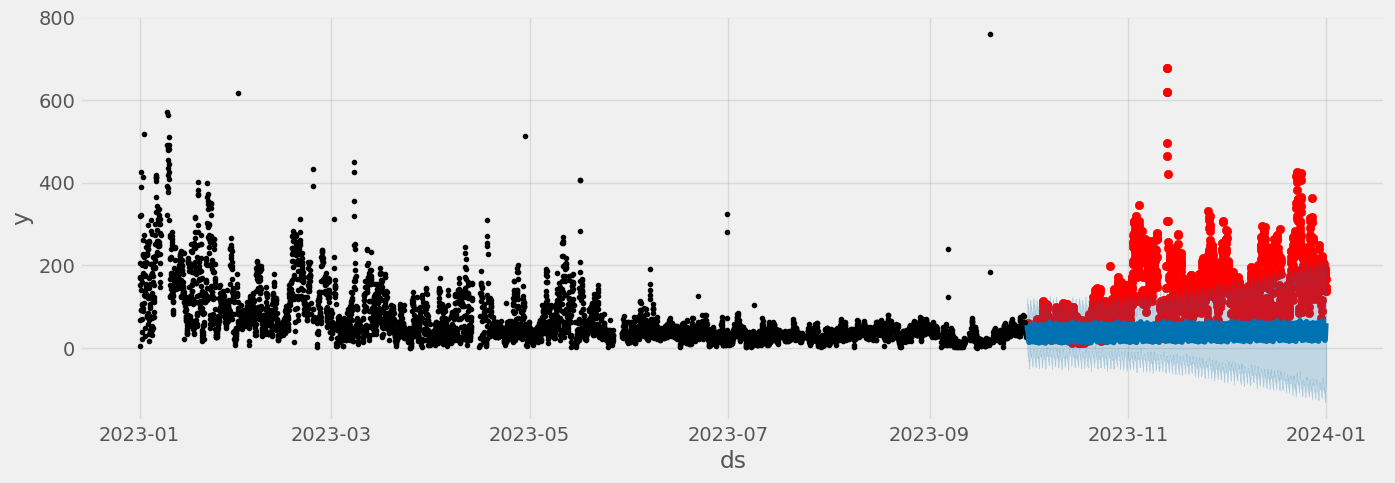

In [109]:
f,ax= plt.subplots(figsize=(15,5))
ax.scatter(pm_test['ds'], pm_test['y'],color='r')
fig=m.plot(pm_test_fcst,ax=ax)  #evaluation

In [110]:
#checking for first month

ConversionError: Failed to convert value(s) to axis units: '2023-11-01'

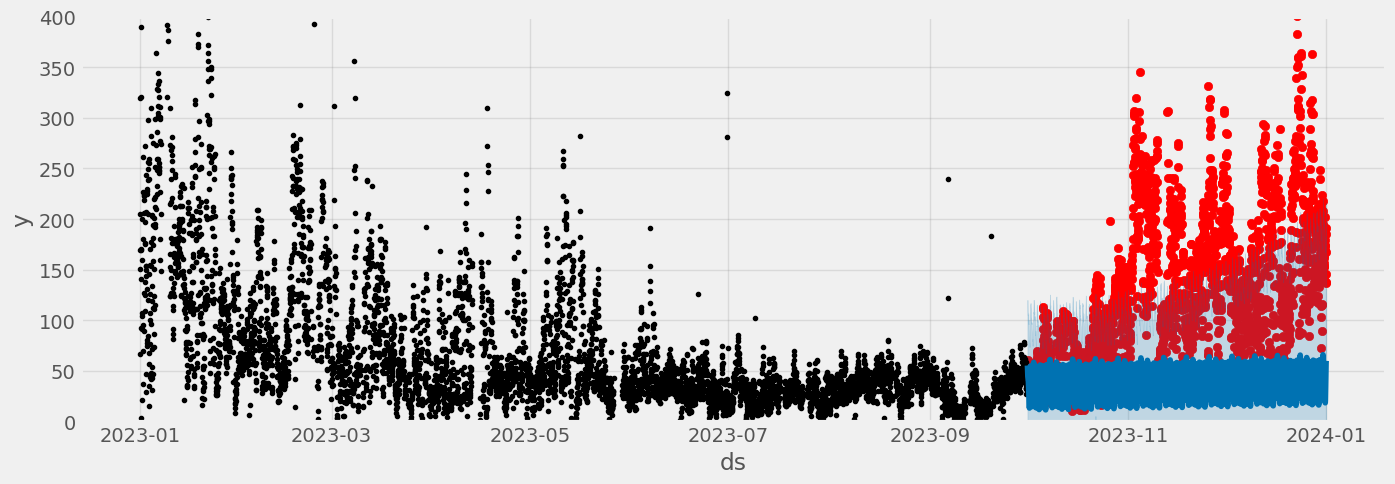

In [127]:
#checking for the first month
f,ax= plt.subplots(figsize=(15,5))
ax.scatter(pm_test['ds'], pm_test['y'],color='r')
ax.set_ylim(0,400)
f=m.plot(pm_test_fcst,ax=ax)
ax.set_xbound(lower='2024-01-01',
             upper='2023-11-01')

In [111]:
pm_test.head()

,ds,y,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,2023-10-01 01:00:00,41.0750,132.8500,11.7400,13.3000,1.6875,12.9525
1,2023-10-01 02:00:00,35.4850,122.6450,11.0625,13.1800,1.7125,13.3725
2,2023-10-01 03:00:00,51.2425,129.3525,11.6875,13.2725,1.8025,13.7025
3,2023-10-01 04:00:00,52.2350,144.9375,12.3900,13.5275,1.7950,13.9275
4,2023-10-01 05:00:00,45.6725,141.9275,12.8850,13.5250,1.9125,14.3150


In [124]:
pm_test_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-10-01 01:00:00,35.413748,-1.575809,120.168991,35.413748,35.413748,19.910150,19.910150,19.910150,15.776968,15.776968,15.776968,4.133182,4.133182,4.133182,0.0,0.0,0.0,55.323898
1,2023-10-01 02:00:00,35.416115,-10.353356,110.121487,35.416115,35.416115,15.297157,15.297157,15.297157,11.404807,11.404807,11.404807,3.892350,3.892350,3.892350,0.0,0.0,0.0,50.713272
2,2023-10-01 03:00:00,35.418483,-15.821291,105.179882,35.418483,35.418483,11.447234,11.447234,11.447234,7.820828,7.820828,7.820828,3.626407,3.626407,3.626407,0.0,0.0,0.0,46.865717
3,2023-10-01 04:00:00,35.420850,-17.682715,107.062068,35.420850,35.420850,9.064177,9.064177,9.064177,5.725665,5.725665,5.725665,3.338511,3.338511,3.338511,0.0,0.0,0.0,44.485027
4,2023-10-01 05:00:00,35.423217,-21.202065,106.424623,35.423217,35.423217,7.931454,7.931454,7.931454,4.899408,4.899408,4.899408,3.032047,3.032047,3.032047,0.0,0.0,0.0,43.354672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,2023-12-31 19:00:00,40.626611,-107.261454,188.806751,-88.532770,181.699175,-5.033688,-5.033688,-5.033688,-3.881358,-3.881358,-3.881358,-1.152330,-1.152330,-1.152330,0.0,0.0,0.0,35.592923
2203,2023-12-31 20:00:00,40.628978,-99.779396,193.385997,-88.604920,181.781109,4.110321,4.110321,4.110321,5.422257,5.422257,5.422257,-1.311936,-1.311936,-1.311936,0.0,0.0,0.0,44.739299
2204,2023-12-31 21:00:00,40.631345,-93.554600,203.382237,-88.677070,181.863043,12.156332,12.156332,12.156332,13.596959,13.596959,13.596959,-1.440628,-1.440628,-1.440628,0.0,0.0,0.0,52.787677
2205,2023-12-31 22:00:00,40.633713,-84.770037,216.185743,-88.818558,181.944977,17.516282,17.516282,17.516282,19.053814,19.053814,19.053814,-1.537532,-1.537532,-1.537532,0.0,0.0,0.0,58.149995


In [128]:
all_data.to_csv("final_data.csv")